# Sergio Busquets Pressure Regions and Zones vs Sevilla(Home Game)

- This is an analysis of Sergio Busquets' pressing(pressure) regions and zones during the home game against Sevilla in the 2018/19 season.

- Data was gathered from StatsBomb

In [1]:
#Loading the libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects


from mplsoccer.pitch import Pitch, VerticalPitch

from matplotlib.colors import LinearSegmentedColormap
import cmasher as cmr
from mplsoccer.utils import FontManager

In [2]:
df = pd.read_csv('barca_sevilla.csv')

In [3]:
df.head()

,Unnamed: 0,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Barcelona,00:00:00.000,Starting XI,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 352, 'lineup': [{'player': {'id'...",Sevilla,00:00:00.000,Starting XI,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:00:00.000,Half Start,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:00.000,Half Start,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:00:00.000,Half Start,NaN


In [4]:
df.columns

Index(['Unnamed: 0', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_deflection',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_penalty', 'foul_committed_type',
       'foul_won_advantage', 'foul_won_defensive', 'foul_won_penalty',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pas

In [5]:
#Filtering out the columns that are required
df = df[['team', 'player','type', 'location', 'pass_end_location']]

In [6]:
df.head()

,team,player,type,location,pass_end_location
0,Barcelona,NaN,Starting XI,NaN,NaN
1,Sevilla,NaN,Starting XI,NaN,NaN
2,Sevilla,NaN,Half Start,NaN,NaN
3,Barcelona,NaN,Half Start,NaN,NaN
4,Sevilla,NaN,Half Start,NaN,NaN


In [7]:
#Filtering out the locations for only Pressures
df = df[(df['team']=='Barcelona') & (df['type']=='Pressure')]

In [8]:
df.head()

,team,player,type,location,pass_end_location
2749,Barcelona,Luis Alberto Suárez Díaz,Pressure,"[53.0, 49.0]",NaN
2750,Barcelona,Arthur Henrique Ramos de Oliveira Melo,Pressure,"[50.0, 51.0]",NaN
2751,Barcelona,Ivan Rakitić,Pressure,"[50.0, 51.0]",NaN
2752,Barcelona,Sergio Busquets i Burgos,Pressure,"[41.0, 50.0]",NaN
2755,Barcelona,Jordi Alba Ramos,Pressure,"[55.0, 13.0]",NaN


In [9]:
df['player'].unique()

array(['Luis Alberto Suárez Díaz',
       'Arthur Henrique Ramos de Oliveira Melo', 'Ivan Rakitić',
       'Sergio Busquets i Burgos', 'Jordi Alba Ramos',
       'Lionel Andrés Messi Cuccittini', 'Nélson Cabral Semedo',
       'Clément Lenglet', 'Ousmane Dembélé', 'Philippe Coutinho Correia',
       'Gerard Piqué Bernabéu', 'Sergi Roberto Carnicer',
       'Munir El Haddadi Mohamed'], dtype=object)

In [10]:
#Filtering out the locations for only Sergio Busquets
df = df[(df['team']=='Barcelona') & (df['type']=='Pressure') & (df['player']=='Sergio Busquets i Burgos')]
df.head()

,team,player,type,location,pass_end_location
2752,Barcelona,Sergio Busquets i Burgos,Pressure,"[41.0, 50.0]",NaN
2760,Barcelona,Sergio Busquets i Burgos,Pressure,"[80.0, 50.0]",NaN
2761,Barcelona,Sergio Busquets i Burgos,Pressure,"[85.0, 45.0]",NaN
2778,Barcelona,Sergio Busquets i Burgos,Pressure,"[72.0, 46.0]",NaN
2782,Barcelona,Sergio Busquets i Burgos,Pressure,"[50.0, 76.0]",NaN


In [11]:
df[['x', 'y']] = df['location'].str.split(expand=True)

In [12]:
df.head()

,team,player,type,location,pass_end_location,x,y
2752,Barcelona,Sergio Busquets i Burgos,Pressure,"[41.0, 50.0]",NaN,"[41.0,",50.0]
2760,Barcelona,Sergio Busquets i Burgos,Pressure,"[80.0, 50.0]",NaN,"[80.0,",50.0]
2761,Barcelona,Sergio Busquets i Burgos,Pressure,"[85.0, 45.0]",NaN,"[85.0,",45.0]
2778,Barcelona,Sergio Busquets i Burgos,Pressure,"[72.0, 46.0]",NaN,"[72.0,",46.0]
2782,Barcelona,Sergio Busquets i Burgos,Pressure,"[50.0, 76.0]",NaN,"[50.0,",76.0]


In [13]:
df['x'] = df.loc[:,'x'] = df.x.map(lambda x: x[1:-1]).astype(float)
df['y'] = df.loc[:,'y'] = df.y.map(lambda x: x[0:-1]).astype(float)

In [14]:
df.head()

,team,player,type,location,pass_end_location,x,y
2752,Barcelona,Sergio Busquets i Burgos,Pressure,"[41.0, 50.0]",NaN,41.0,50.0
2760,Barcelona,Sergio Busquets i Burgos,Pressure,"[80.0, 50.0]",NaN,80.0,50.0
2761,Barcelona,Sergio Busquets i Burgos,Pressure,"[85.0, 45.0]",NaN,85.0,45.0
2778,Barcelona,Sergio Busquets i Burgos,Pressure,"[72.0, 46.0]",NaN,72.0,46.0
2782,Barcelona,Sergio Busquets i Burgos,Pressure,"[50.0, 76.0]",NaN,50.0,76.0


In [15]:
df = df.drop(['location', 'pass_end_location'], axis=1)

In [16]:
df.head()

,team,player,type,x,y
2752,Barcelona,Sergio Busquets i Burgos,Pressure,41.0,50.0
2760,Barcelona,Sergio Busquets i Burgos,Pressure,80.0,50.0
2761,Barcelona,Sergio Busquets i Burgos,Pressure,85.0,45.0
2778,Barcelona,Sergio Busquets i Burgos,Pressure,72.0,46.0
2782,Barcelona,Sergio Busquets i Burgos,Pressure,50.0,76.0


In [17]:
df = df[['x','y']]

In [18]:
df

,x,y
2752,41.0,50.0
2760,80.0,50.0
2761,85.0,45.0
2778,72.0,46.0
2782,50.0,76.0
2797,51.0,40.0
2799,40.0,41.0
2828,47.0,22.0
2832,23.0,72.0
2840,50.0,26.0


In [19]:
cmap_dict = cmr.cm.cmap_cd
all_cmap_dict = {}
for cmap_type_key in cmap_dict:
    for key, cmap in cmap_dict[cmap_type_key].items():
        if key[-2:] != '_r':
            all_cmap_dict[key] = cmap

In [20]:
#Creating some Linear Segmented Colors
el_greco_yellow_cmap = LinearSegmentedColormap.from_list("El Greco Yellow - 10 colors",
                                                         ['#7c2e2a', '#f2dd44'], N=10)

pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

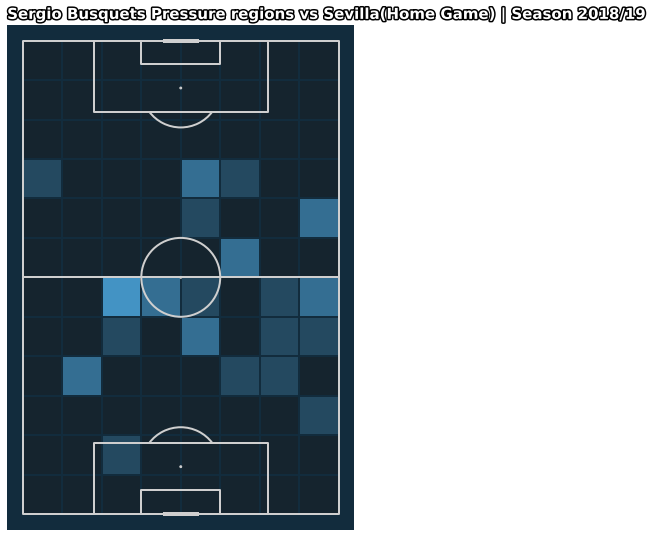

In [33]:
#Heatmap for just the pressure regions
pitch = VerticalPitch(line_color='#cfcfcf', line_zorder=2, pitch_color='#122c3d')
fig, ax = pitch.draw(figsize=(8.5,8.5))
bs = pitch.bin_statistic(df.x, df.y, bins=(12,8))
heatmap = pitch.heatmap(bs, ax=ax, edgecolors='#122c3d', cmap=pearl_earring_cmap)
ax.set_title('Sergio Busquets Pressure regions vs Sevilla(Home Game) | Season 2018/19',
            loc='left', fontweight='bold', fontsize=15, color='white',path_effects=path_eff);

In [23]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

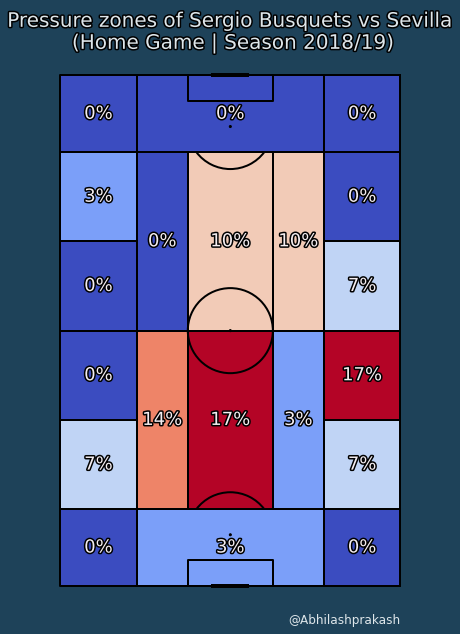

In [34]:
#Heatmap for the Pressure zones as per Juego de Posicion
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#1e4259', line_color='black')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                    title_height=0.08, title_space=0,
                    axis=False, grid_height=0.84)

fig.set_facecolor("#1e4259")

bin_statistic = pitch.bin_statistic_positional(df.x, df.y, statistic='count', positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'], edgecolors='black', cmap='coolwarm')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)


axs['endnote'].text(1,0.1, '@Abhilashprakash', va='center', ha='right', fontsize=12, color='#dee6ea')
axs['title'].text(0.5, 0.5, "Pressure zones of Sergio Busquets vs Sevilla\n (Home Game | Season 2018/19)", color='#dee6ea',
                  va='center', ha='center', path_effects=path_eff, fontsize=20);